## Global Visualisation for Suicide Trends Around the Globe

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('Downloads/who_suicide_statistics.csv')
print("No. of Countries available for analysis :", df['country'].nunique())
print("Shape:", df.shape)
corr = df['suicides_no'].corr(df['population'])
print("Correlation Between Suicides and Population : {0:.2f}".format(corr))

In [ ]:
df.isnull().sum()#number of missing values
df.dropna(axis=0,inplace=True) # deleting null values
df.shape #new shape after deleteion of values


In [ ]:
df.head()


### 
Assigning diffrent. Age Groups and Gender Groups 


In [34]:
age_coder = {'5-14 years':0,
            '15-24 years':1,
            '25-34 years':2,
            '35-54 years':3,
            '55-74 years':4,
            '75+ years':5} #assigning diff values to each group in the dataset
gender_coder = {'female':0,'male':1} # assigning diff values to each gender group in the dataset
age = {0:'5-14 years',
      1:'15-24 years',
      2:'25-34 years',
      3:'35-54 years',
      4:'55-74 years',
      5:'75+ years'}
sex = {0:'female',1:'male'}


In [35]:
df['age_encoder'] = df['age'].map(age_coder)
df['sex_encoder'] = df['sex'].map(gender_coder)

In [36]:
df.head()

,country,year,sex,age,suicides_no,population,age_encoder,sex_encoder
24,Albania,1987,female,15-24 years,14.0,289700.0,1,0
25,Albania,1987,female,25-34 years,4.0,257200.0,2,0
26,Albania,1987,female,35-54 years,6.0,278800.0,3,0
27,Albania,1987,female,5-14 years,0.0,311000.0,0,0
28,Albania,1987,female,55-74 years,0.0,144600.0,4,0


### Global Suicide Trend Among Age Groups


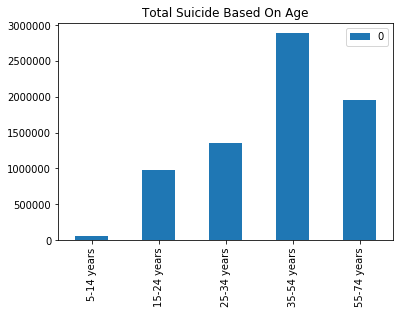

In [37]:
Below_15_years = df[df.age_encoder == 0]['suicides_no'].values.sum() #Observing the suicide trend among the diff age groups by adding up all the values for diff age groups in diff countries
Below_25_years = df[df.age_encoder == 1]['suicides_no'].values.sum()
Below_35_years = df[df.age_encoder == 2]['suicides_no'].values.sum()
Below_55_years = df[df.age_encoder == 3]['suicides_no'].values.sum()
Below_75_years = df[df.age_encoder == 4]['suicides_no'].values.sum()

ad = pd.DataFrame([Below_15_years, Below_25_years, Below_35_years, Below_55_years, Below_75_years],index=['5-14 years','15-24 years','25-34 years' ,'35-54 years','55-74 years'])
ad.head()
ad.plot(kind='bar',title="Total Suicide Based On Age")
plt.legend()

### Global Suicide Trend on the basis of Gender 

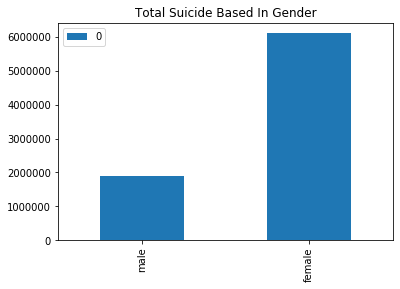

In [38]:

male_suicide = df[df.sex_encoder == 0]['suicides_no'].values.sum()
female_suicide = df[df.sex_encoder == 1]['suicides_no'].values.sum()

ad = pd.DataFrame([male_suicide,female_suicide],index=['male','female'])
ad.head()
ad.plot(kind='bar',title="Total Suicide Based In Gender",)
plt.legend()

### Top 10 Countries with the most no of Suicides.

<Figure size 1080x432 with 0 Axes>

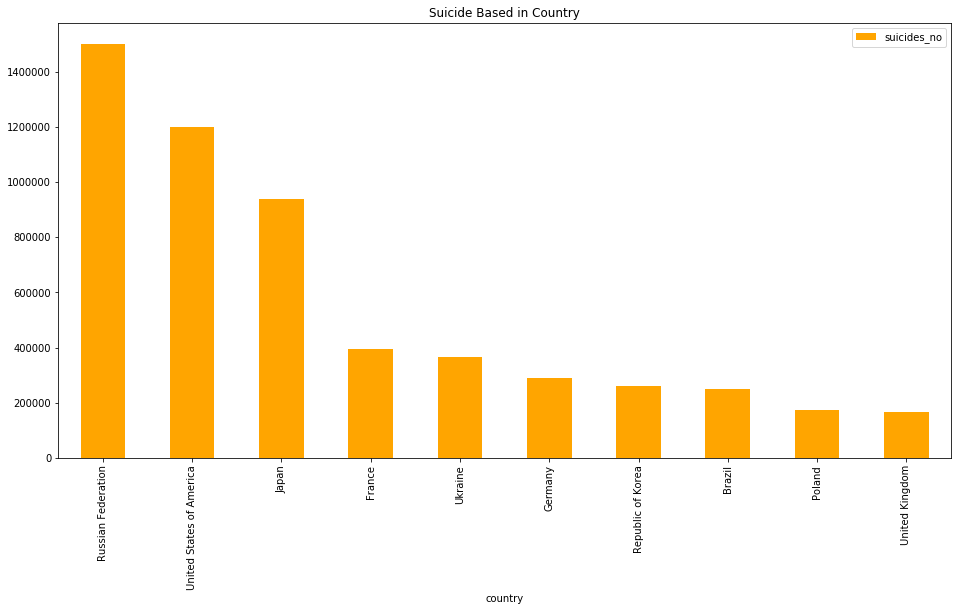

In [39]:
plt.figure(figsize=(15,6))
df.groupby('country').sum().sort_values(by='suicides_no',ascending=False)[['suicides_no']][:10].plot(kind='bar',figsize=(16,8),title='Suicide Based in Country', color = 'orange')


#### We can observe that amongst the top 10:   Russia has experienced the most suicides , whereas UnitedKingdom has seen the least .



##### ^ We will analyse the suicides and its trend in the later part of the project using various classification and regression techiniques. 

### Suicides on the basis of Year


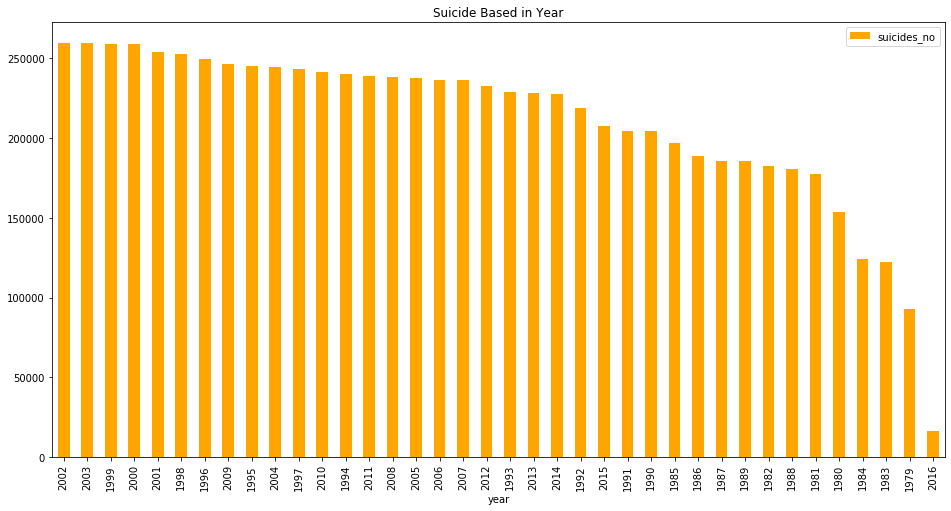

In [40]:
df.groupby("year").sum().sort_values(by='suicides_no',ascending=False)[['suicides_no']].plot(kind='bar',figsize=(16,8),title='Suicide Based in Year', color = 'orange')

#### This data clearly gives the evidence that humanity experinced a huge number of suicides during the change of the millenium 

### Checking Which Algo Suits Better

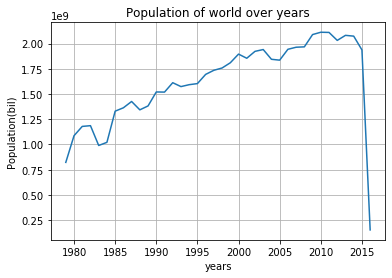

In [43]:
years = np.unique(df.year)

a = []
dict = {}
for i in years:
    sum = df[df['year']==i]['population'].values.sum()
    dict[i] = sum 
a.append(dict)
Worldyear_df = pd.DataFrame(a)
Worldyear_df = np.transpose(Worldyear_df) #correction of length missmatch if any
Worldyear_df.columns = ['Population'] 

plt.plot(Worldyear_df)
plt.title('Population of world over years')
plt.xlabel('years')
plt.ylabel('Population(bil)')
plt.grid()
plt.show()

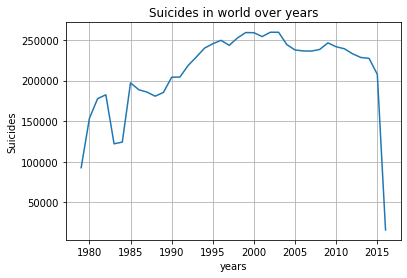

In [44]:
years = np.unique(df.year)

a = []
dict = {}
for i in years:
    sum = df[df['year']==i]['suicides_no'].values.sum()
    dict[i] = sum 
a.append(dict)
Worldyear_df = pd.DataFrame(a)
Worldyear_df = np.transpose(Worldyear_df) #correction of length missmatch if any
Worldyear_df.columns = ['Suicides'] 

plt.plot(Worldyear_df)
plt.title('Suicides in world over years')
plt.xlabel('years')
plt.ylabel('Suicides')
plt.grid()
plt.show()

In [ ]:
UK = df[df['country']=='United Kingdom']
x = UK.iloc[:, [6,7]]
y = UK.suicides_no

In [51]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 42)

In [52]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [53]:
from sklearn.linear_model import LogisticRegression

from sklearn import svm, tree,naive_bayes,neighbors
classifiers =[]
model2 = svm.SVC()
classifiers.append(model2)
model3 = tree.DecisionTreeClassifier()
classifiers.append(model3)
model14 = LogisticRegression()
classifiers.append(model14)
model15 = naive_bayes.GaussianNB()
classifiers.append(model15)
model16 = neighbors.KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)
classifiers.append(model16)

In [ ]:

from sklearn.metrics import accuracy_score

for clf in classifiers:
    clf.fit(x_train, y_train)
    y_pred= clf.predict(x_test)
    acc = accuracy_score(y_test, y_pred)
    print("Accuracy of %s is %s"%(clf, acc))

### ____________ Algorithm Suits the most so we'll use it for further analysis to predict the number of sucides in the coming year.

### -------------------- Algorithm

### * Accuracy of all the classification algorithms is very low , so it is better to do regression instead